In [24]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") # To avoid warnings globally

In [3]:
# Reading the 'Kc_House_Price' data set
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# The column names of the data frame
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# For the K-Means clustering, we will consider only the numerical data
data_num = data[['price', 'bedrooms', 'bathrooms', 'sqft_living']]
# Get first 5 rows of the data set
print(data_num.head())
# Confirming the type of columns
data_num.dtypes # All columns are numerical in nature

      price  bedrooms  bathrooms  sqft_living
0  221900.0         3       1.00         1180
1  538000.0         3       2.25         2570
2  180000.0         2       1.00          770
3  604000.0         4       3.00         1960
4  510000.0         3       2.00         1680


price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [17]:
# For the K-Means Clustering, another requirement is to scale the numeric data
# This can be achieved in many ways

# Method-1: By Defining a Z-scale function
def scale(x):
    return (x-np.mean(x))/np.std(x)

# Applying this scale function on the data_num data frame on its columns (axis = 0)
data_scale = data_num.apply(scale, axis = 0)
print(data_scale.head())

print('--------------------------------------------------------------------------------------------------------')

# Method-2: By Using the sklearn's preprocessing module
from sklearn.preprocessing import scale
data_mod = scale(data_num, axis = 0)
print(data_mod)

print('-------------------------------------------------------------------------------------------------------')

# Explorating data_mod
print(str(type(data_mod)))

      price  bedrooms  bathrooms  sqft_living
0 -0.866717 -0.398737  -1.447464    -0.979835
1 -0.005688 -0.398737   0.175607     0.533634
2 -0.980849 -1.473959  -1.447464    -1.426254
3  0.174090  0.676485   1.149449    -0.130550
4 -0.081958 -0.398737  -0.149007    -0.435422
--------------------------------------------------------------------------------------------------------
[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]
-------------------------------------------------------------------------------------------------------
<class 'numpy.ndarray'>


In [26]:
# Initiation of the Clustering Algorithm

# Loading required packages
from sklearn.cluster import KMeans

# Model Building;Consider the Clustering model name as 'model'
model = KMeans(n_clusters = 3, init = 'k-means++')

# Fitting the Numeric data_mod data into the cluster model
model.fit(data_mod)

# Data lables in the model
labels = model.labels_
print(labels)

print('--------------------------------------------------------------------------------------------------------')

# Determining the Cluster Centers
centers = model.cluster_centers_
print(centers)

[2 0 2 ... 2 0 2]
--------------------------------------------------------------------------------------------------------
[[-0.03330895  0.35811127  0.37210379  0.22831016]
 [ 1.89559286  1.08485603  1.54033069  1.92448262]
 [-0.46402224 -0.72445351 -0.86271079 -0.79001253]]


In [30]:
# Defining the WSS values depending on the data_mod and number of clusters
from scipy.spatial.distance import cdist
k = range(1,20)
wss = []
for k in k:
    model = KMeans(n_clusters = k, init = "k-means++")
    model.fit(data_mod)
    wss_val = sum(np.min(cdist(data_mod , model.cluster_centers_, 'euclidean'), axis = 1))/data_mod.shape[0]
    wss.append(wss_val)
# Printing the WSS values for 1-19 clusters
print(len(wss))

19


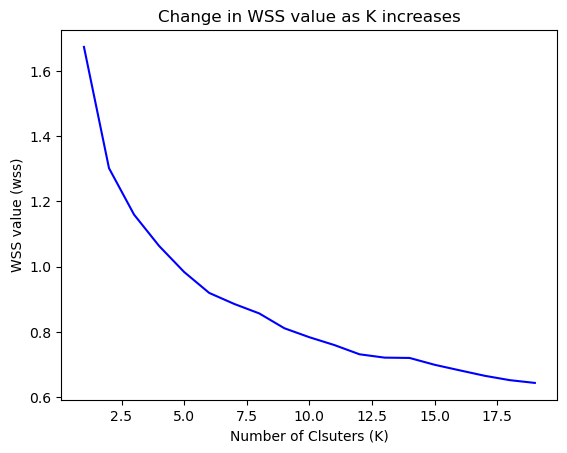

In [35]:
# Plotting the Elbow plot
# The X-axis represents the number of clusters
# The Y-axis represents the WSS values
k = range(1,20)
plt.plot(k, wss, color = 'blue')
plt.xlabel('Number of Clsuters (K)')
plt.ylabel('WSS value (wss)')
plt.title('Change in WSS value as K increases')
plt.show()

In [48]:
# Build a clustr model using 8 clusters
labelscl8 = KMeans(n_clusters = 8, random_state = 200).fit(data_mod).labels_
print('The labels are:',labelscl8)

# Performance Evaluation of the KMeans Clustering model
# Loading required library
from sklearn.metrics import silhouette_score

# Getting silhouette score for the just build cluster model
scorecl8 = silhouette_score(data_mod, labelscl8, metric = 'euclidean', sample_size = 10000, random_state = 200)
print('The Silhouette Score for k = 8 is:',scorecl8)

The labels are: [4 2 0 ... 0 2 0]
The Silhouette Score for k = 8 is: 0.28313711901054794


In [62]:
# Improving the value of silhouette score depending on the number of clusters considered
score_list = []
for i in range(1,20):
    labels = KMeans(n_clusters = i, random_state = 200).fit(data_mod).labels_
    score = silhouette_score(data_mod, labelsi, metric = 'euclidean', sample_size = 1000, random_state = 200)
    print("Silhoutte score for k= "+str(i)+" is "+str(score))

Silhoutte score for k= 1 is 0.28296703727224737
Silhoutte score for k= 2 is 0.28296703727224737
Silhoutte score for k= 3 is 0.28296703727224737
Silhoutte score for k= 4 is 0.28296703727224737
Silhoutte score for k= 5 is 0.28296703727224737
Silhoutte score for k= 6 is 0.28296703727224737
Silhoutte score for k= 7 is 0.28296703727224737
Silhoutte score for k= 8 is 0.28296703727224737
Silhoutte score for k= 9 is 0.28296703727224737
Silhoutte score for k= 10 is 0.28296703727224737
Silhoutte score for k= 11 is 0.28296703727224737
Silhoutte score for k= 12 is 0.28296703727224737
Silhoutte score for k= 13 is 0.28296703727224737
Silhoutte score for k= 14 is 0.28296703727224737
Silhoutte score for k= 15 is 0.28296703727224737
Silhoutte score for k= 16 is 0.28296703727224737
Silhoutte score for k= 17 is 0.28296703727224737
Silhoutte score for k= 18 is 0.28296703727224737
Silhoutte score for k= 19 is 0.28296703727224737


In [67]:
# Creating Cluster Profiles
import cluster_profiles as cluster_profiles

# Create a cluster model with 8 clusters
model = KMeans(n_clusters=8, random_state=200).fit(data_mod)

# Use the get_zprofiles module under cluster_profiles library
# Note that, for this case, we use the unscaled data
cluster_profiles.get_zprofiles(data = data_num.copy(), kmeans = model) 
# These talk about the Z values of each feature in each cluster

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,-0.493924,-1.571351,-1.209739,-1.072065,2450
1,0.654910,0.348343,0.740250,0.999961,3090
2,-0.198342,-0.493953,0.205852,-0.229094,5623
3,0.275685,2.132508,1.032018,1.020563,1070
4,-0.538350,-0.282547,-1.038216,-0.783293,4109
5,6.410548,1.250798,2.649467,3.697950,161
6,2.289677,0.925680,1.731940,2.197224,988
7,-0.260912,0.804022,0.131739,0.044929,4122
